In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [56]:
#Lets load the datafile
data = pd.read_csv('/Users/sohamghosh/Desktop/pythonscripts/USL Case study/Country-data.csv')

In [57]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [58]:
#lETS EXPLORE THE DATA
data.shape

(167, 10)

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<Axes: >

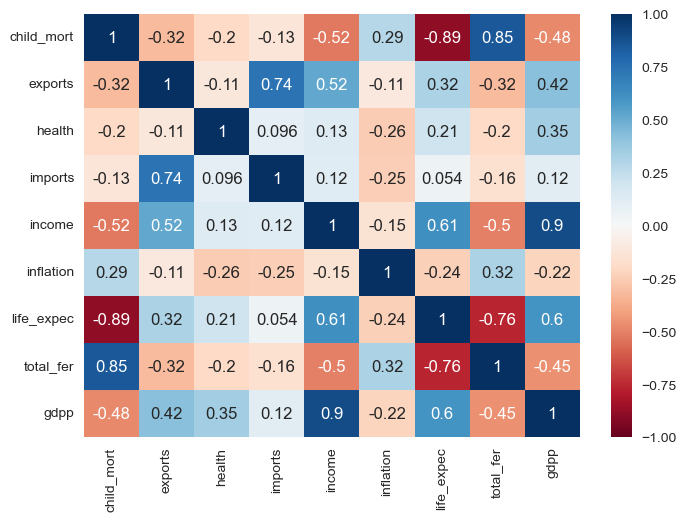

In [60]:
#Correlation HeatMap
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,cmap='RdBu')

## Visualize the data

In [61]:
#Before we begin visualization lets convert country  to index .(As its a reduntant column)
data.set_index('country',inplace=True)
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [62]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


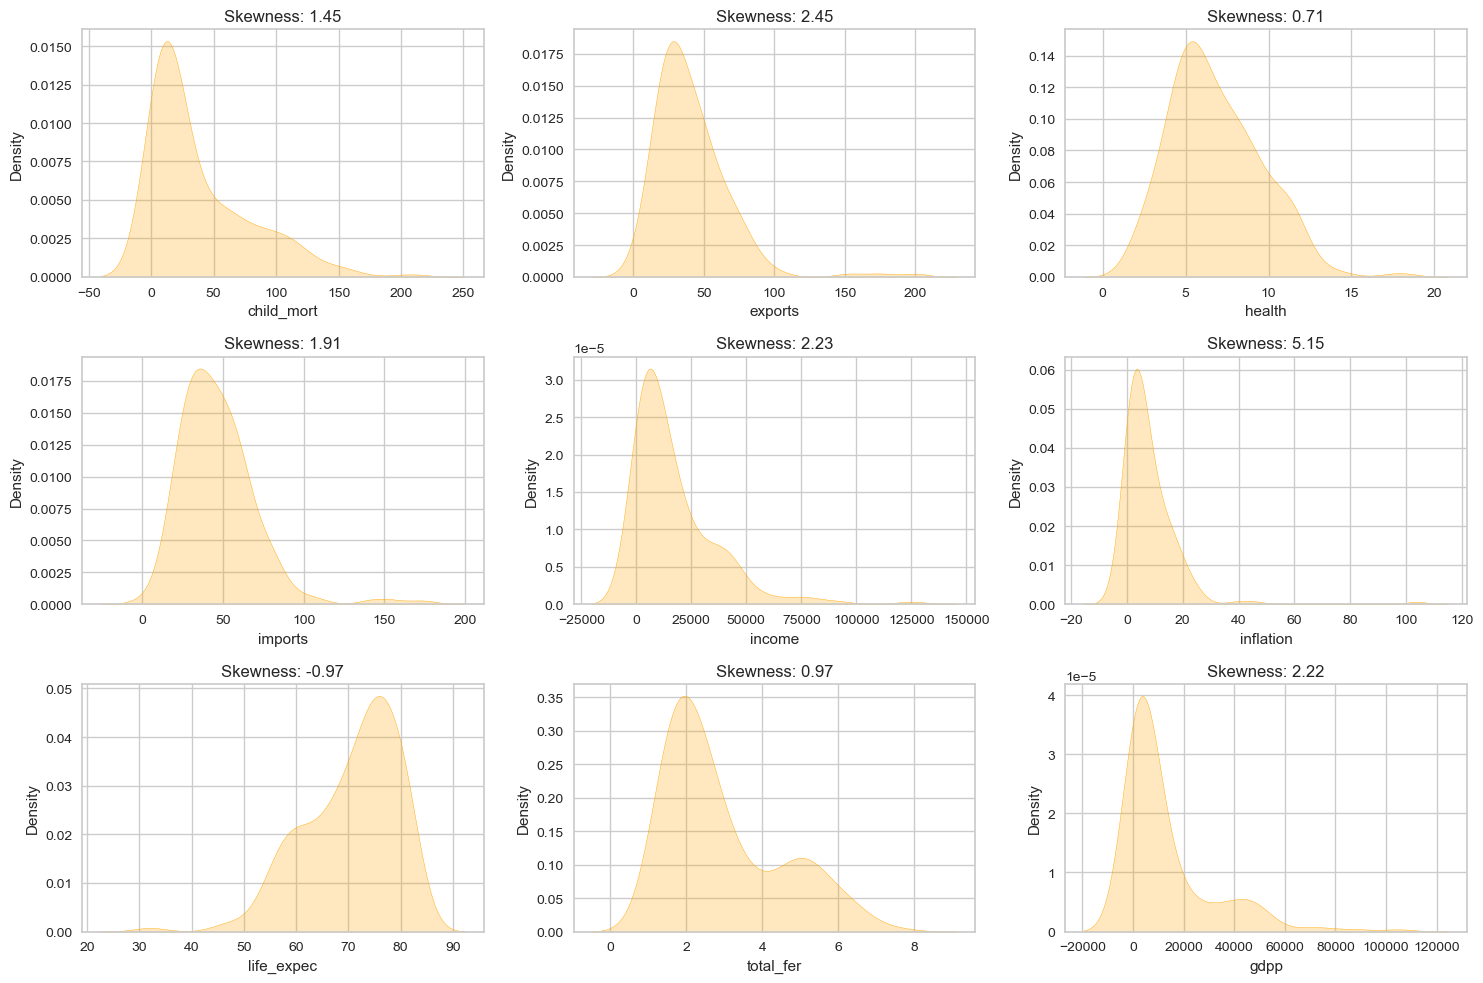

In [63]:
# Lets do the univariate analysis 
t = 1 
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data, x = i, fill = True,color = 'orange')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t +=1 
plt.tight_layout()
plt.show()

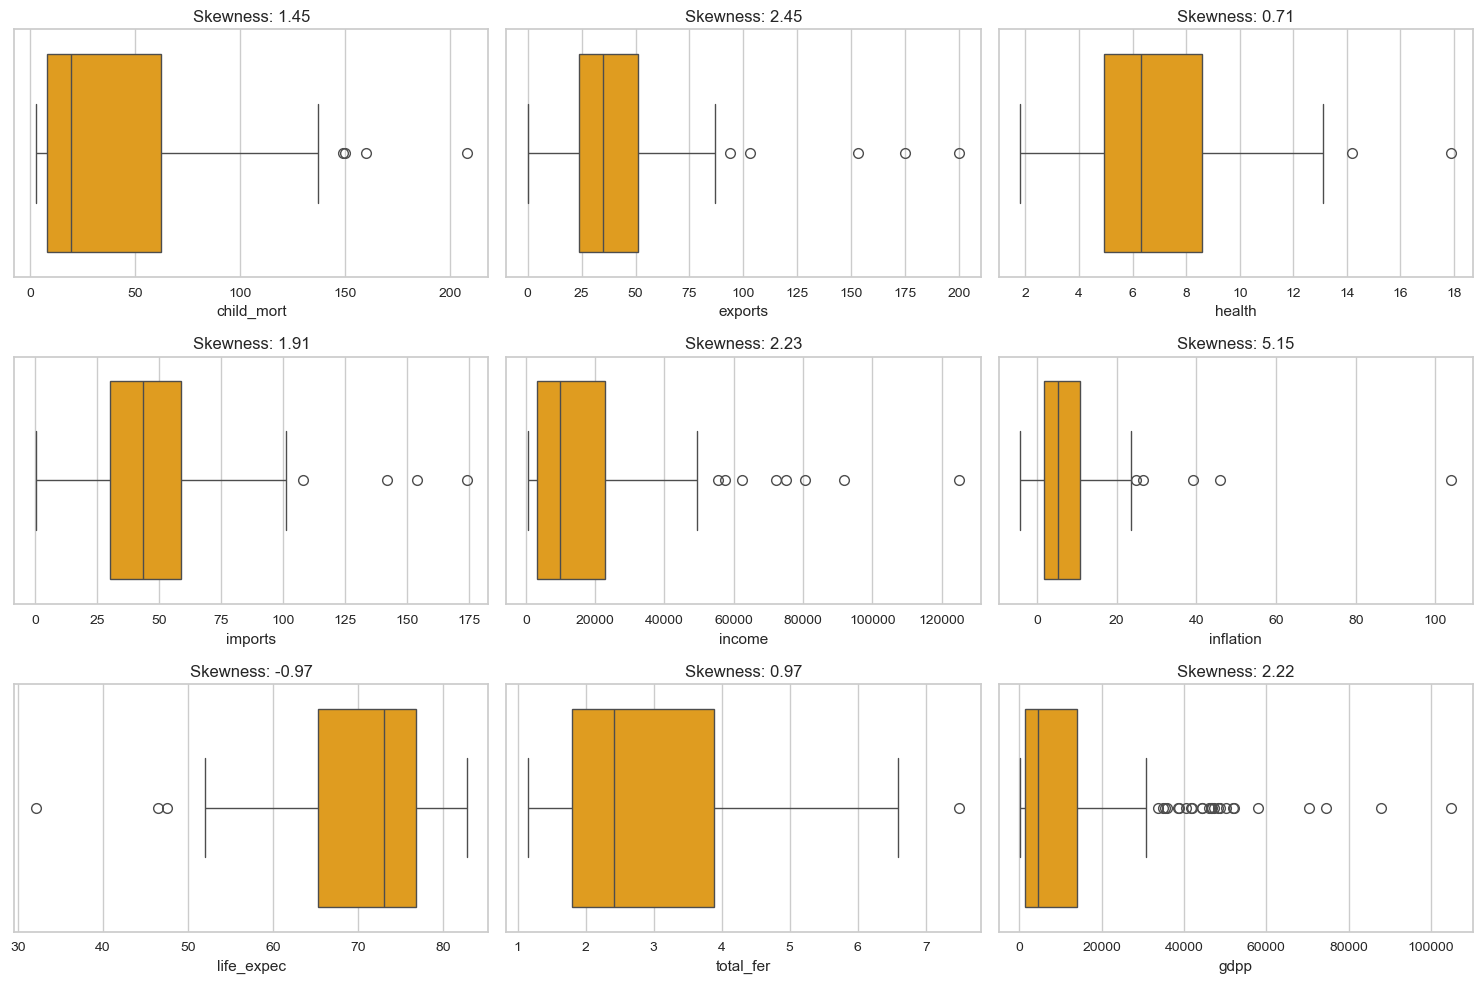

In [64]:
# check the outliers 
t = 1 
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data, x = i,color = 'orange')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t +=1 
plt.tight_layout()
plt.show()

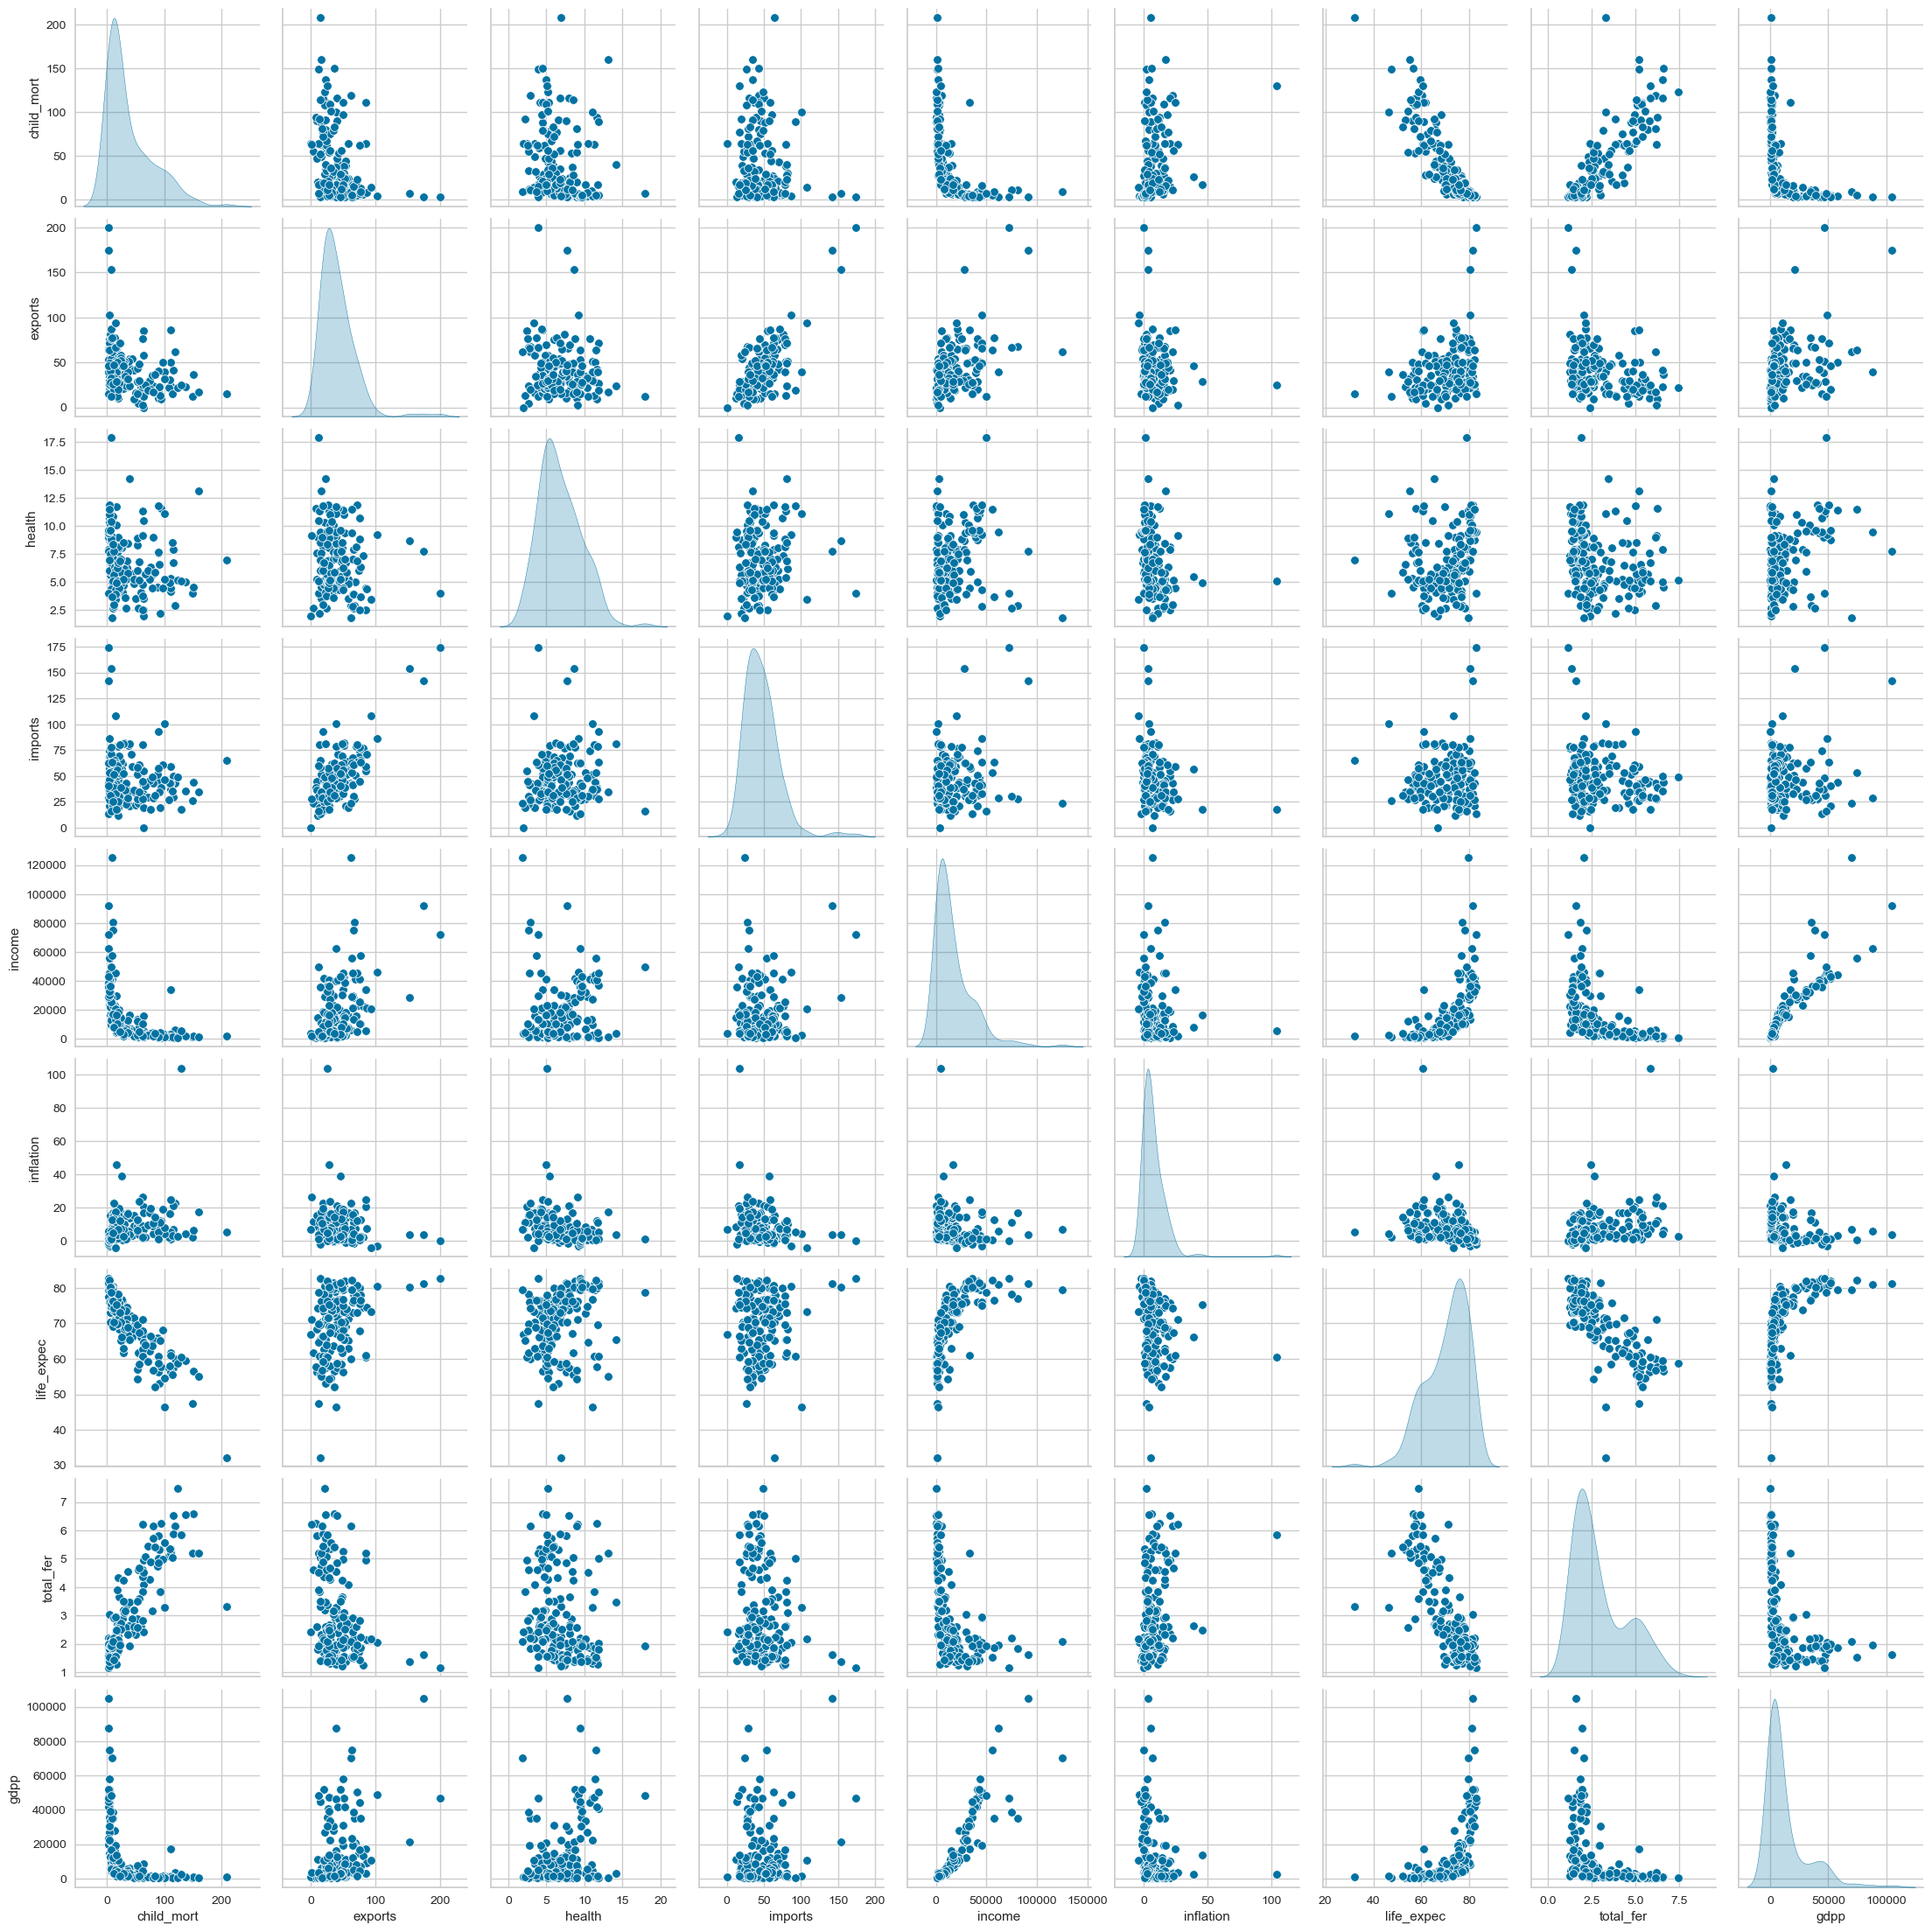

In [65]:
#Multivariate Analysis
sns.pairplot(data,diag_kind='kde')
plt.show()

In [66]:
### Preprocessing

In [67]:
# Check for missing values
data.isnull().sum().sum()


#No missing values

0

In [68]:
#Lets treat the outliers 
#We will go with capping using IQR method
#In order to cap only the extreme outliers lets keep whisker length = 2.5

for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

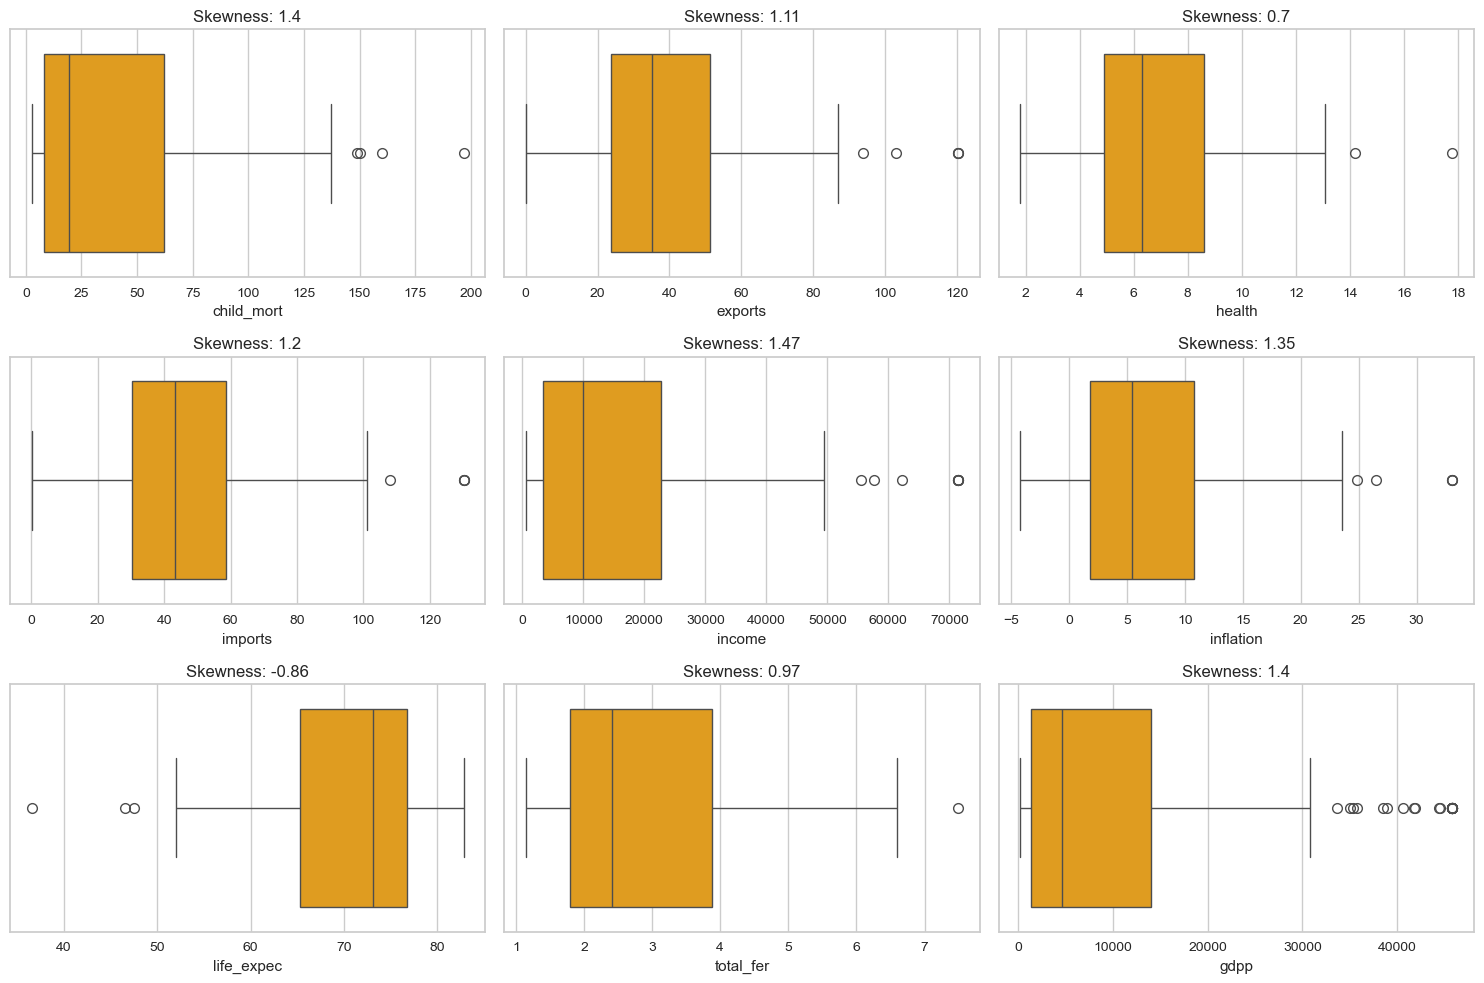

In [69]:
# check the outliers 
t = 1 
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data, x = i,color = 'orange')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t +=1 
plt.tight_layout()
plt.show()

In [70]:
# Lets apply PCA on the data before we proceed with clustering . Just to have better visualization and better clustering.
#In PCA we need to pass standardized data. So lets import the functions from libraries.

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [71]:
#Lets create an instance of scalling 

scaler = StandardScaler()

#Also lets create an instance for PCA
pca = PCA(n_components=5,random_state=2)

#lets create pipeline for the above two processes
pipeline = Pipeline([('scale',scaler),('PCA',pca)])

In [72]:
pipeline.fit(data)

Pipeline(steps=[('scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [73]:
pca.explained_variance_ratio_.cumsum()

#At n_components = 5 , we are able to explain approximately 95% variance ; which is good enough
#So 9-Dimension data can be reduced to 5 Dimension.

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [74]:

final_data = pipeline.transform(data)

In [75]:
#.transform returns the array so lets onvert it into a dataframe
final_data

array([[-3.04363665e+00, -2.01155292e-01,  9.51322351e-01,
         7.93444721e-01, -6.80001185e-03],
       [ 4.23415208e-01, -3.71462539e-01,  1.71749065e-01,
        -1.35358051e+00,  8.86229412e-02],
       [-4.04683884e-01, -4.40311949e-01, -1.63677511e+00,
        -5.73008378e-01,  3.97118511e-01],
       [-3.15006302e+00,  1.42528284e+00, -1.78498242e+00,
         1.58007124e+00,  1.42608744e-01],
       [ 1.14531297e+00,  3.92984506e-01,  1.51331589e-01,
        -8.23192552e-01, -3.70310799e-01],
       [-9.54170948e-02, -1.94085770e+00, -1.22199962e+00,
        -6.97940551e-03,  1.46093189e+00],
       [-1.77388617e-01, -4.27355752e-01, -5.02299598e-01,
        -1.52366162e+00, -7.48969680e-02],
       [ 2.60291028e+00, -2.23430488e+00,  1.85775655e-01,
         9.24552024e-01, -8.08426394e-01],
       [ 3.37172117e+00, -7.27160920e-01,  7.98543302e-01,
         1.21431820e+00, -2.41834808e-02],
       [-2.30117700e-01, -3.71196507e-01, -1.22883809e+00,
        -1.91571536e-01

In [76]:
final_data = pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)
final_data.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311


## K-means Clustering

In [80]:
# Identify the value of k

#K-elbow visualizer
kelbow = KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

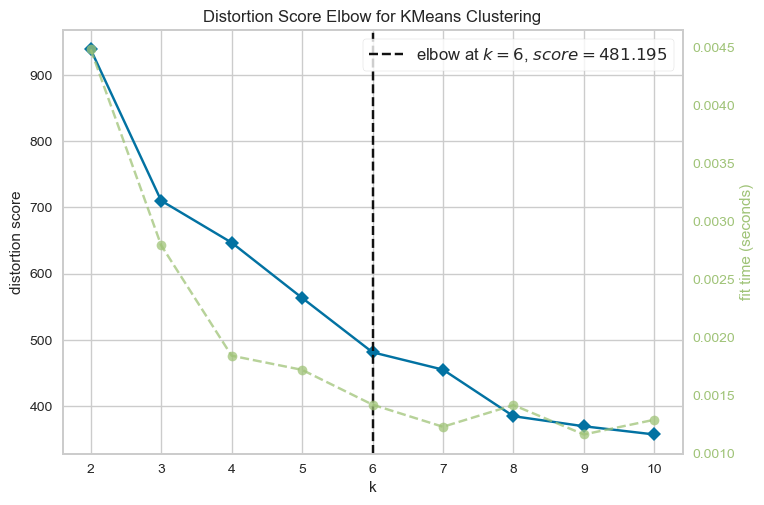

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
kelbow.fit(final_data)
kelbow.show()

Although the above plot marks the elbow at k=6, But, we can see the significant drop in distortion score from k = 2 to k= 3.
As we increase the number of clusters it might become overfitted. Lets explore sillhoutte visualizer to identify the correct or more generalized value of k.

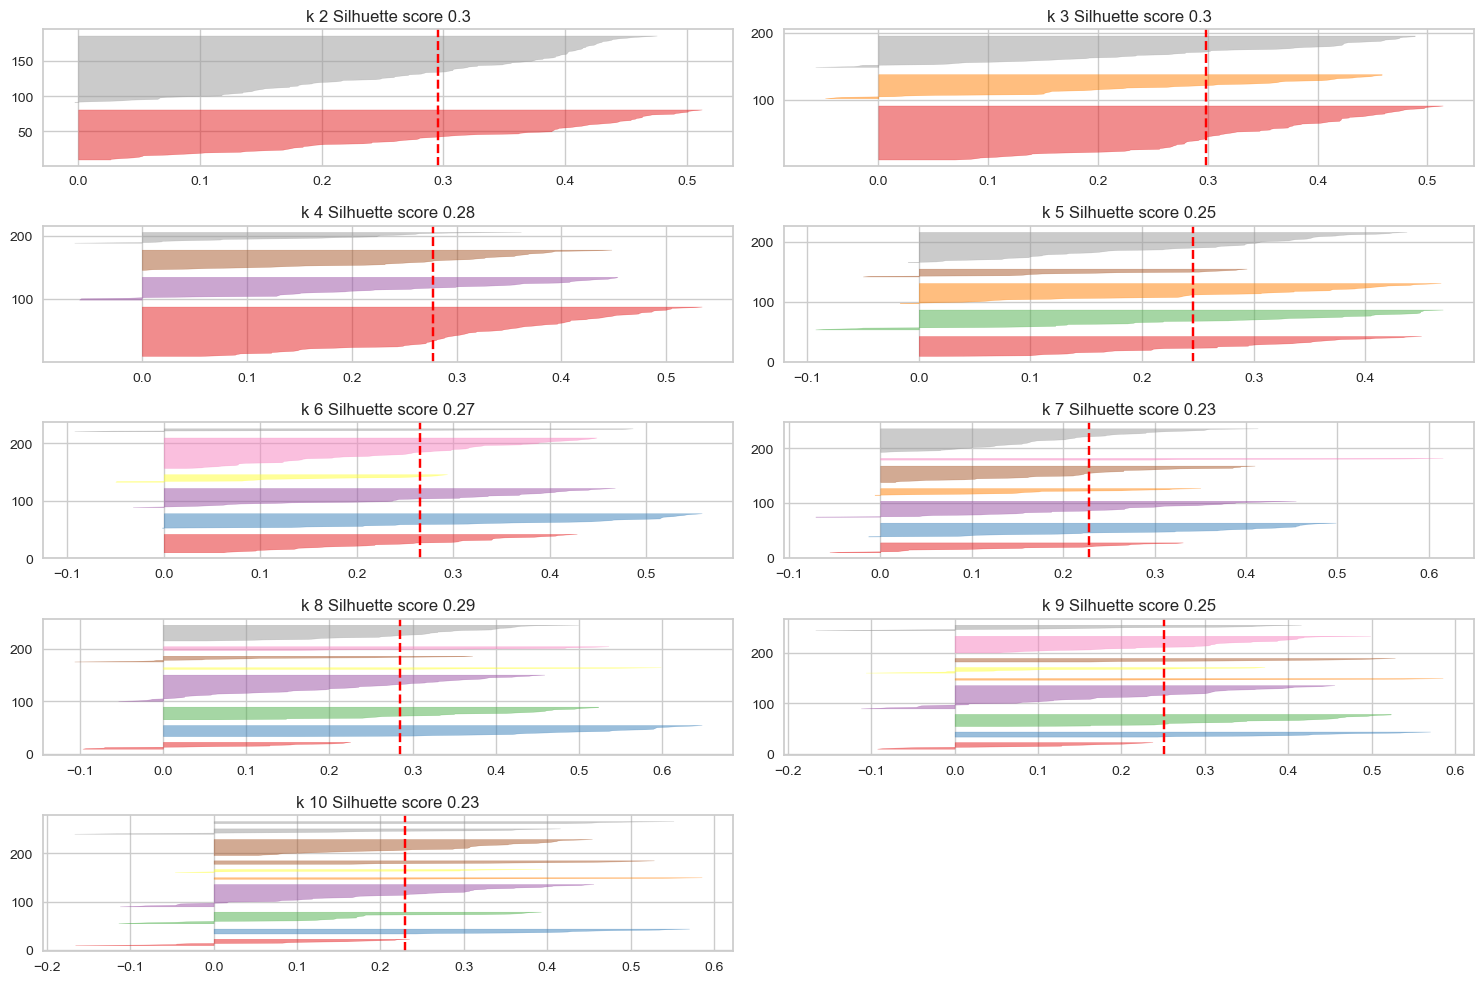

In [92]:
t =1
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'k {i} Silhuette score {round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

After analyzing Elbow plot and silhouette visualizer lets go with k=3,Although there are few datapoints that have been misclassified , but we see no drop in sillhoutte score and there is good enough data in every cluster.Also from k-elbow plot significant drop in WCSS(distortion score) was observed from k=2 to k=3.

In [93]:
final_kmeans= KMeans(n_clusters=3,random_state=2)

In [94]:
labels = final_kmeans.fit_predict(final_data)

In [95]:
#Lets check the sillhoutte score
print('silhouette_score:',silhouette_score(final_data,labels))

silhouette_score: 0.29845782348296634


In [96]:
#lets put this labels on PCA data
final_data['Labels'] = labels
final_data.head()

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609,2
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311,0


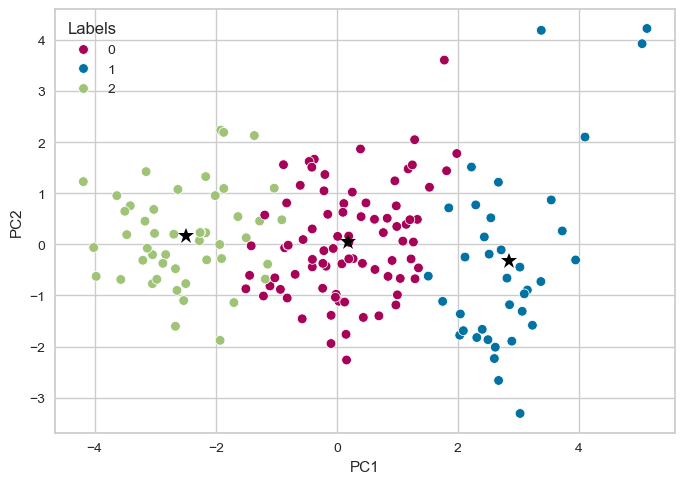

In [102]:
 #Lets Visualize the clusters
#In order to get the best visualization.Lets choose PC1 and PC2 as they have maximum variance 
centroids = final_kmeans.cluster_centers_
centroids


sns.scatterplot(data=final_data,x='PC1',y='PC2',palette=['m','b','g'],hue='Labels')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',color='black',ms='12')
plt.show()

## Business Interpretation

In [104]:
#To have the business understanding lets put the labels on original dataset
data['Labels'] = labels
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [105]:
data.groupby(by='Labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Labels,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667
